In [104]:
'''
50 samples. 3 different species of iris (setosa, versicolor, virginica)
number of samples: 150
Measurements: sepal length, sepal width, petal length, petal width
'''

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np


from IPython.display import IFrame
IFrame('https://www.dataschool.io/files/iris.txt', width=300, height=200)

# in the first row we have:
# 5.1,3.5,1.4,0.2,Iris-setosa
# sepal length: 5.1 cm
# sepal width: 3.5 cm
# petal length: 1.4 cm
# petal width: 0.2 cm
# species: setosa





# Load the iris dataset and display its type and shape. Each row represets one flower, and each column represents a feature/measurement.
 

In [33]:
# Loading the dataset using sklearn

from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris)) # <class 'sklearn.utils.Bunch'>
print(type(iris.data)) # <class 'numpy.ndarray'>
print(iris.data.shape) # (150, 4)
#print(iris.data) # each row is one flower. each column is a feature/measurement


<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(150, 4)


In [34]:
# names of the 4 features
print(iris.feature_names)
# species of each flower
print(iris.target)
print(type(iris.target))
print(iris.target.shape)
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
(150,)
['setosa' 'versicolor' 'virginica']


In [35]:
# store feature matrix in "X"
X = iris.data
# store response vector in "y"
y = iris.target

In [36]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [64]:
knn1 = KNeighborsClassifier(n_neighbors=1) # n_neighbors is hyper-param

In [65]:

# Here it's the model training step. The model learns 
# the relationship between the features and the response.
# the mathematical process through which the learning occurs 
# varies by model.We use the fit method on the knn object and pass it 
# the feature matrix X and the response vector y.
knn1.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [66]:
responseValToSpecies = {0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'}


# Make predictions for new examples.
# we input the measurements for unknown iris and ask
# the fitted model to predict the iris species based on what it has learned in the previous cell.
# we use the predict method on the knn object and pass it the features of the unknown iris
# as a python list.

# the predict method returns a numpy array with the predicted response value
prediction = knn1.predict([[3,5,4,2]])
print(prediction)
print(responseValToSpecies[prediction[0]])

[2]
virginica


In [67]:
# predicting multiple observations using the trained knn model:
new_samples = [[3,5,4,2],[5,4,3,2]]
predictions = knn.predict(new_samples)
print(predictions)
print(predictions.shape)

print(responseValToSpecies[predictions[0]])
print(responseValToSpecies[predictions[1]])

[1 1]
(2,)
versicolor
versicolor


# Try Different value of K. Let's try K = 5. Predict the response with the trained model

In [68]:
# instantiate the model
knn5 = KNeighborsClassifier(n_neighbors=5)
# fit the model with the data
knn5.fit(X,y)
# predict the response for new_samples
predictions = knn5.predict(new_samples)
print(predictions)
print(responseValToSpecies[predictions[0]])
print(responseValToSpecies[predictions[1]])

[1 1]
versicolor
versicolor


# Solve the Iris classification problem, this time using Logisitic Regression


In [72]:
# instantiate logisitic regression model
logisticReg = LogisticRegression(max_iter=130)


# fit the model with data
logisticReg.fit(X,y)

# make predictions for new_samples:
predictions = logisticReg.predict(new_samples)
print(predictions)
print(responseValToSpecies[predictions[0]])
print(responseValToSpecies[predictions[1]])



[0 0]
setosa
setosa


# Evaluate KNN and Logistic Regression using Train/Test split

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=4)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [92]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

LogisticRegression()

In [93]:
# predicting on the test set
predictions = logisticReg.predict(X_test)

# compare predictions to ground truth
print(metrics.accuracy_score(y_test, predictions))

0.9666666666666667


In [94]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)


KNeighborsClassifier()

In [95]:
predictions = knn5.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.9666666666666667


In [96]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [97]:
predictions = knn1.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.95


In [103]:
# try different values of k

accuracy_list = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, predictions))

Text(0, 0.5, 'test accuracy')

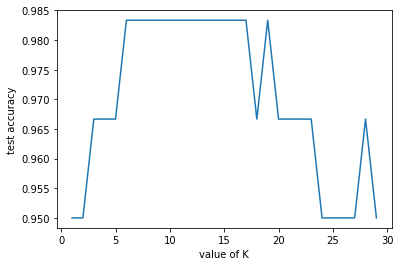

In [107]:
%matplotlib inline

x = np.arange(1,30)
plt.plot(x, accuracy_list)
plt.xlabel('value of K')
plt.ylabel('test accuracy')